# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

%matplotlib notebook

sinasc = pd.read_csv('SINASC_RO_2019.csv')

####  2) Monte um gráfico de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

<IPython.core.display.Javascript object>


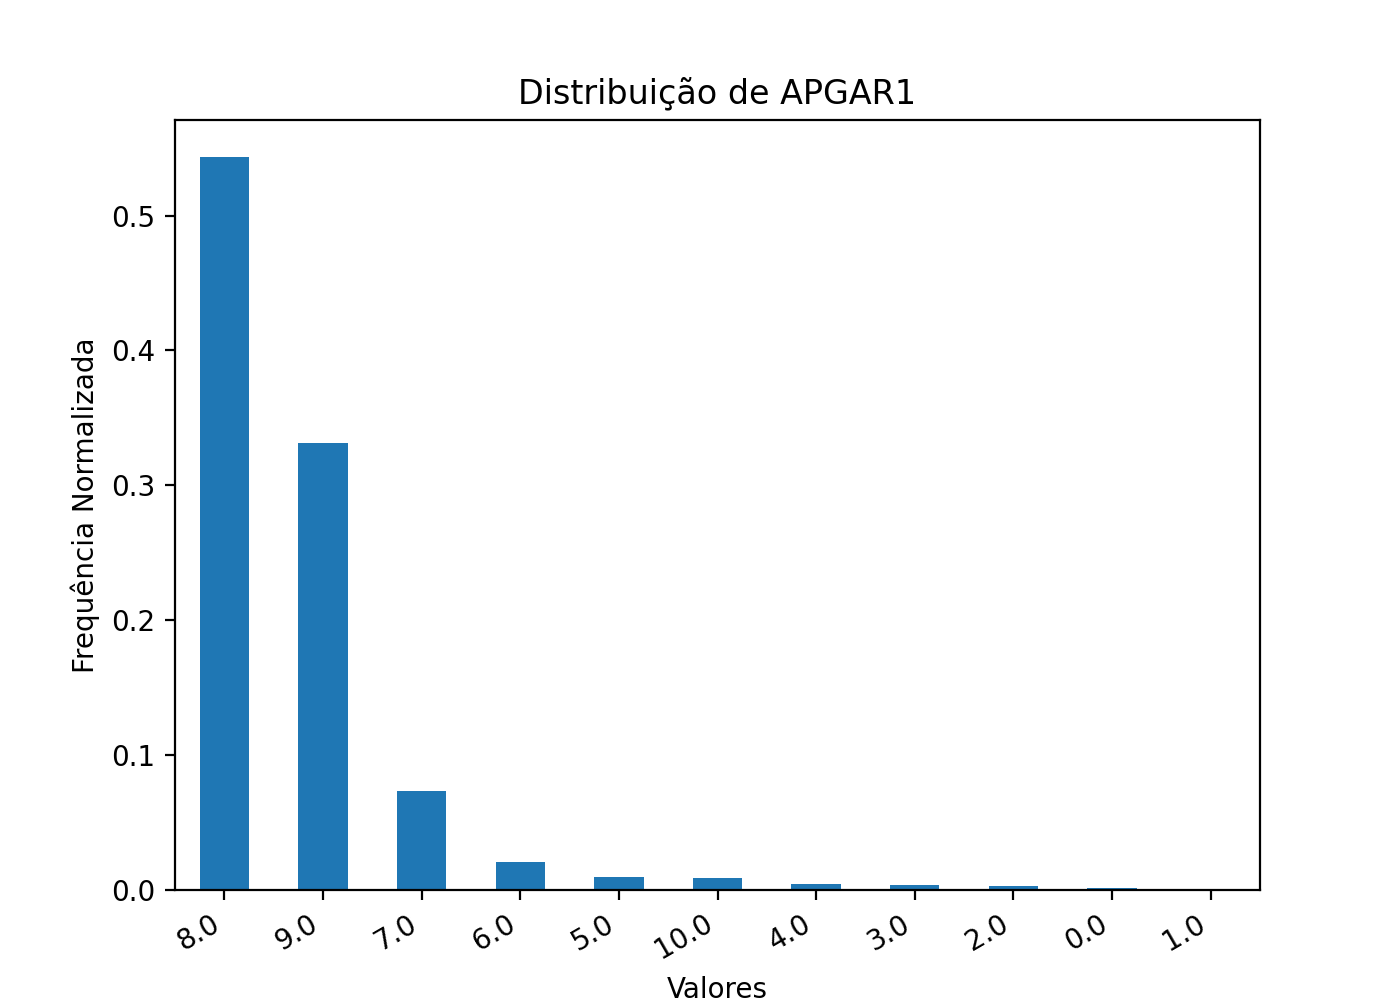

<IPython.core.display.Javascript object>


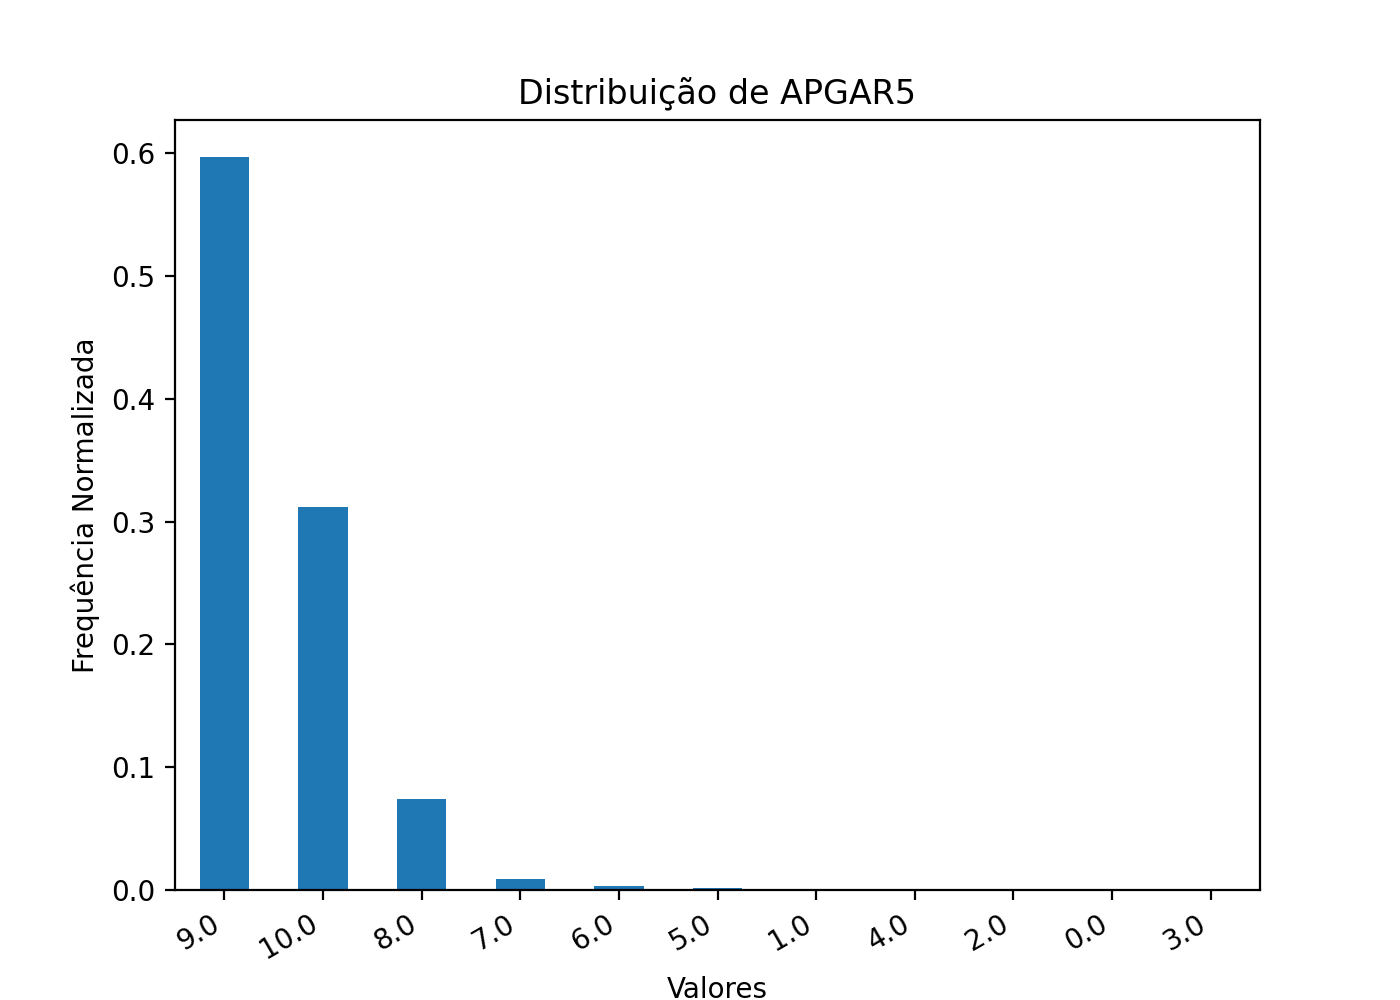

<IPython.core.display.Javascript object>


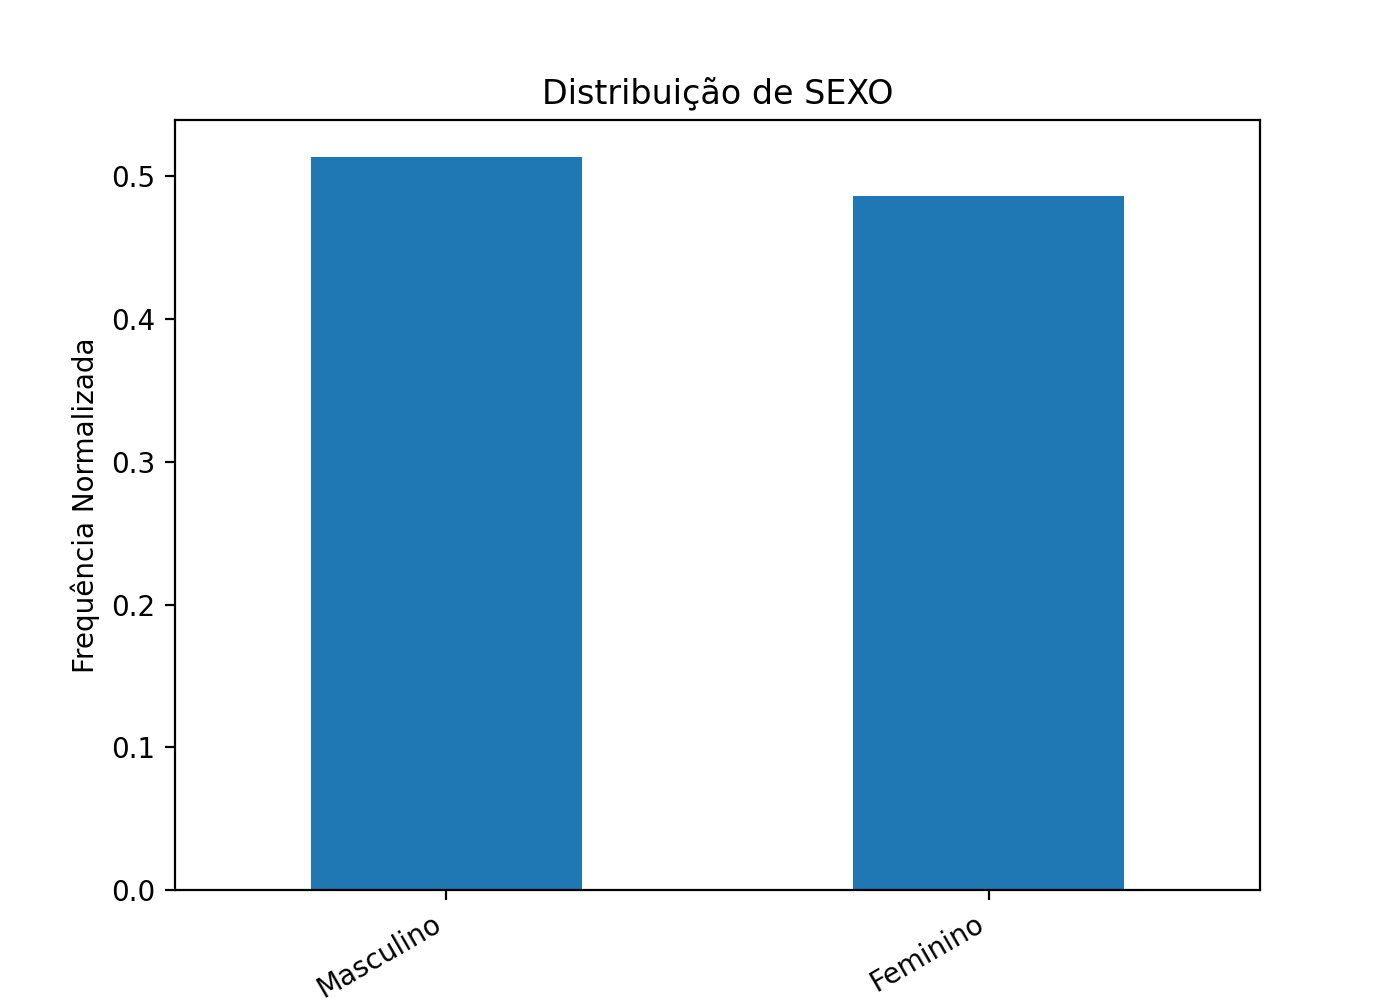

<IPython.core.display.Javascript object>


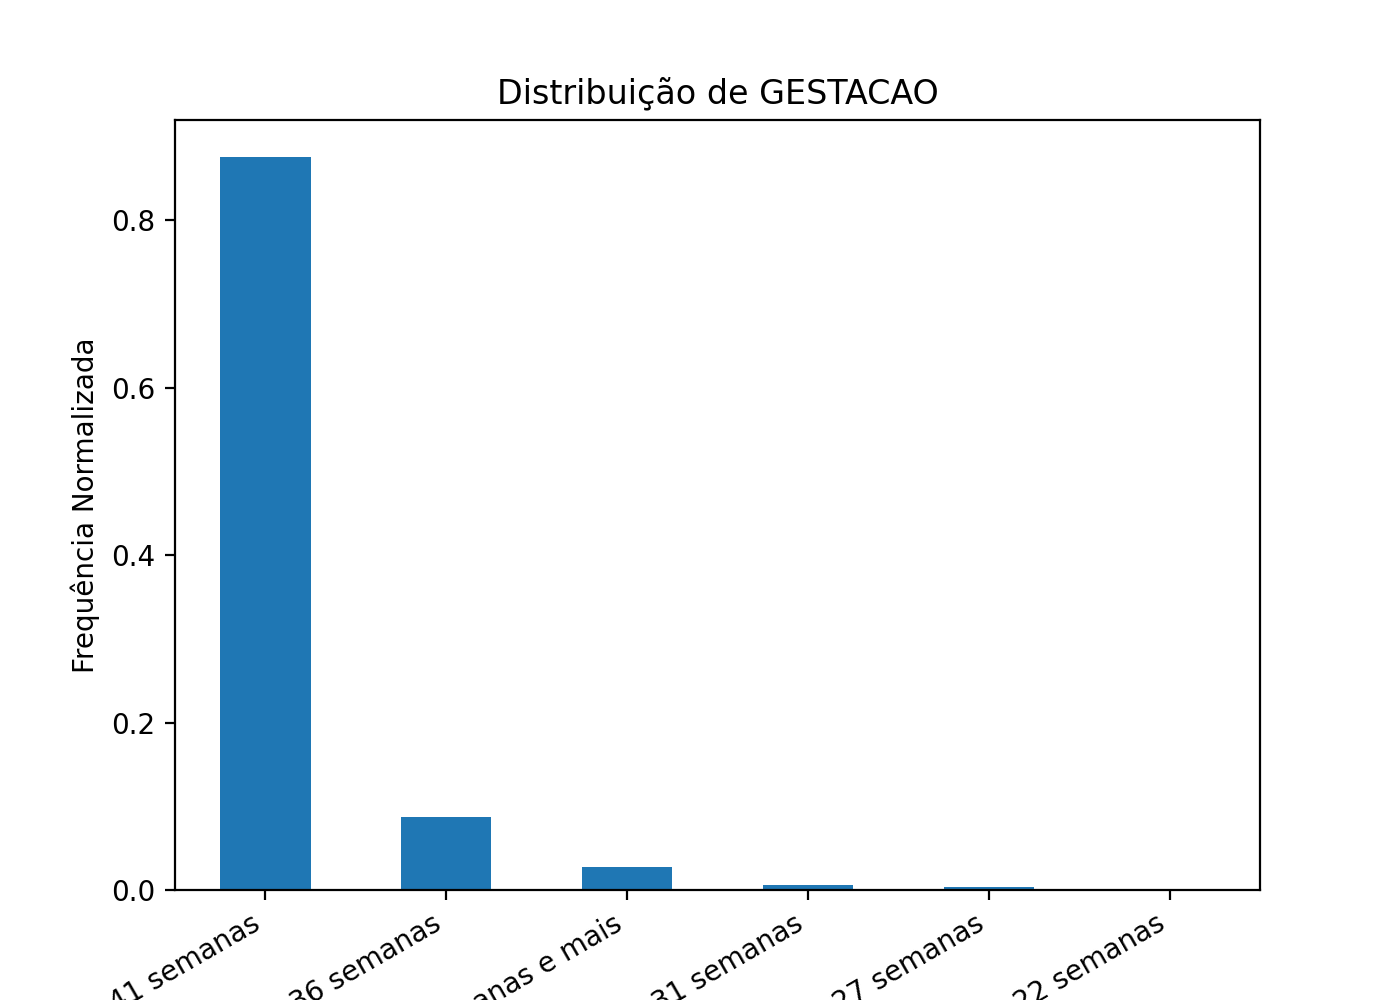

<IPython.core.display.Javascript object>


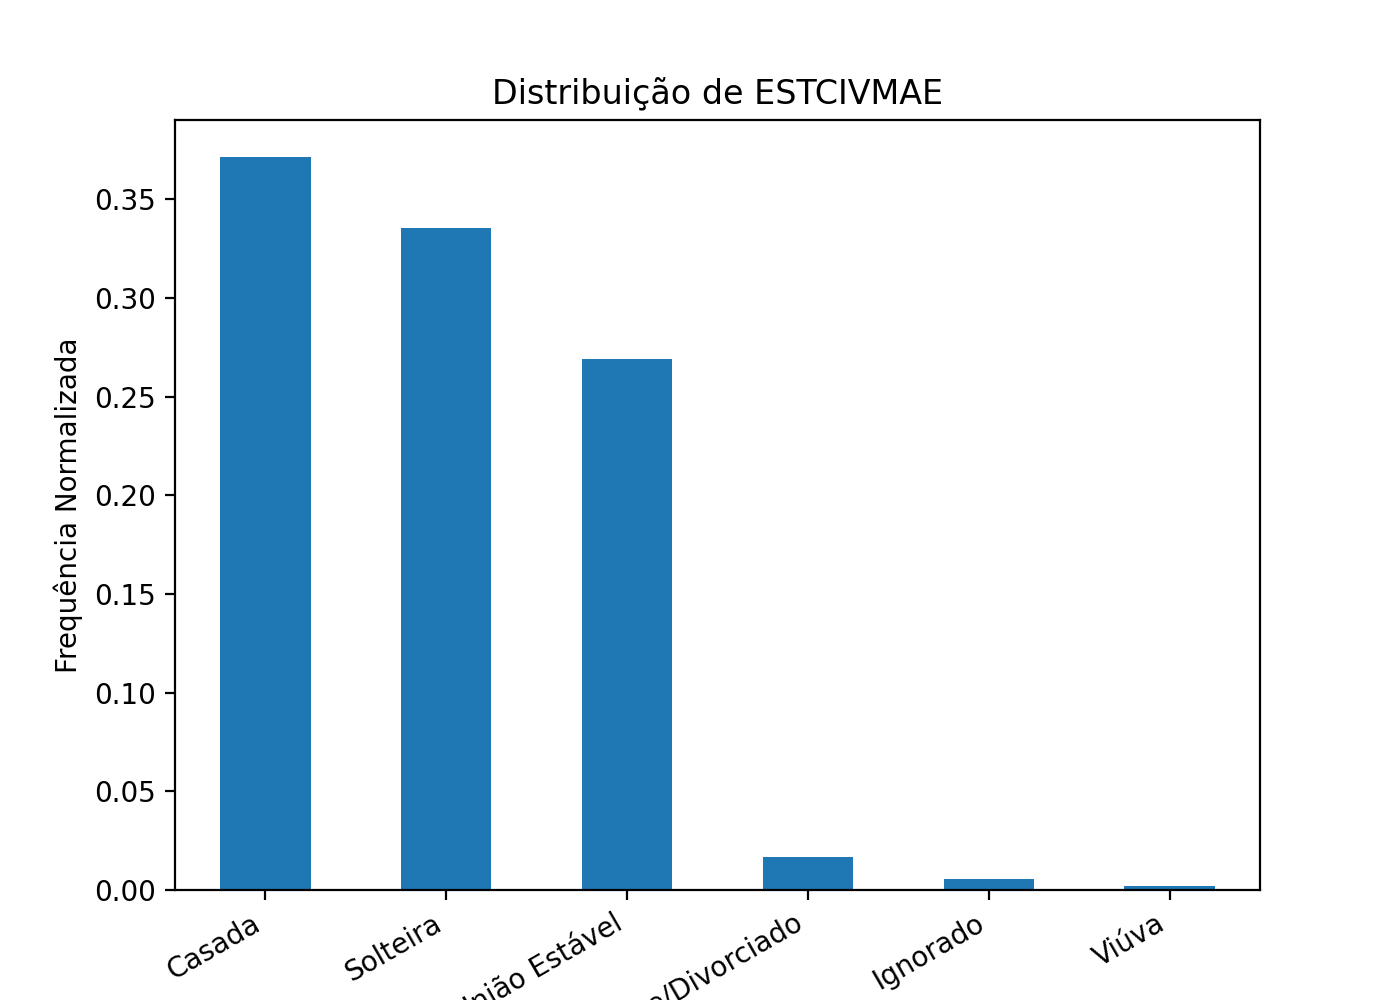

In [57]:
df = sinasc[['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']]

estcivmae_labels = {
    1: 'Solteira',
    2: 'Casada',
    3: 'Viúva',
    4: 'Separado judicialmente/Divorciado',
    5: 'União Estável',
    9: 'Ignorado'
}

sinasc['ESTCIVMAE'] = sinasc['ESTCIVMAE'].replace(estcivmae_labels)

for var in df:
    counts = sinasc[var].value_counts()
    
    normalized_counts = counts / counts.sum()
    
    fig, ax = plt.subplots(figsize=(7, 5))
    normalized_counts.plot(kind='bar', ax=ax)
    
    ax.set_xlabel('Valores')
    ax.set_ylabel('Frequência Normalizada')
    ax.set_title(f'Distribuição de {var}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    
    plt.show()


#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

<IPython.core.display.Javascript object>


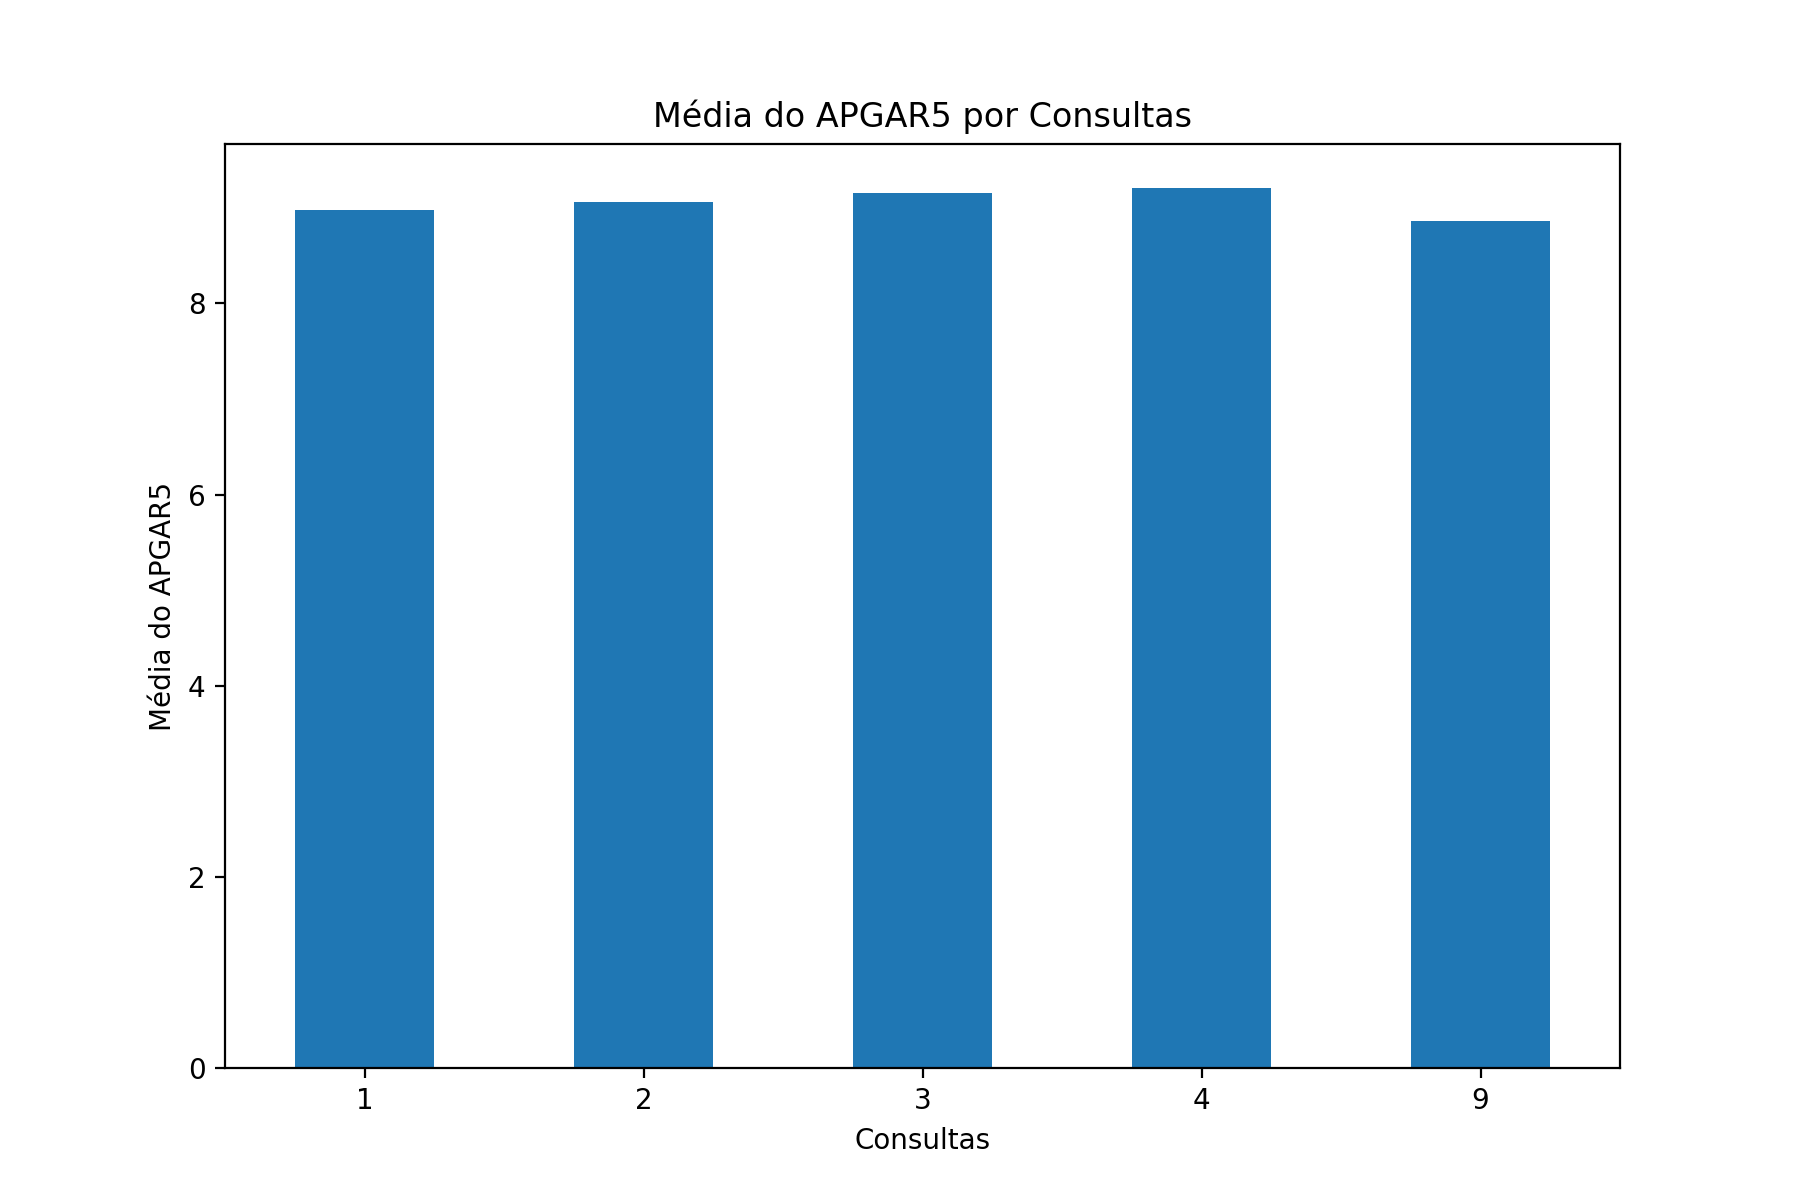

In [58]:
apgar5_por_consultas = sinasc.groupby('CONSULTAS')['APGAR5'].mean()

fig, ax = plt.subplots(figsize=(9, 6))
apgar5_por_consultas.plot(kind='bar', ax=ax)

ax.set_xlabel('Consultas')
ax.set_ylabel('Média do APGAR5')
ax.set_title('Média do APGAR5 por Consultas')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()


####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

<IPython.core.display.Javascript object>


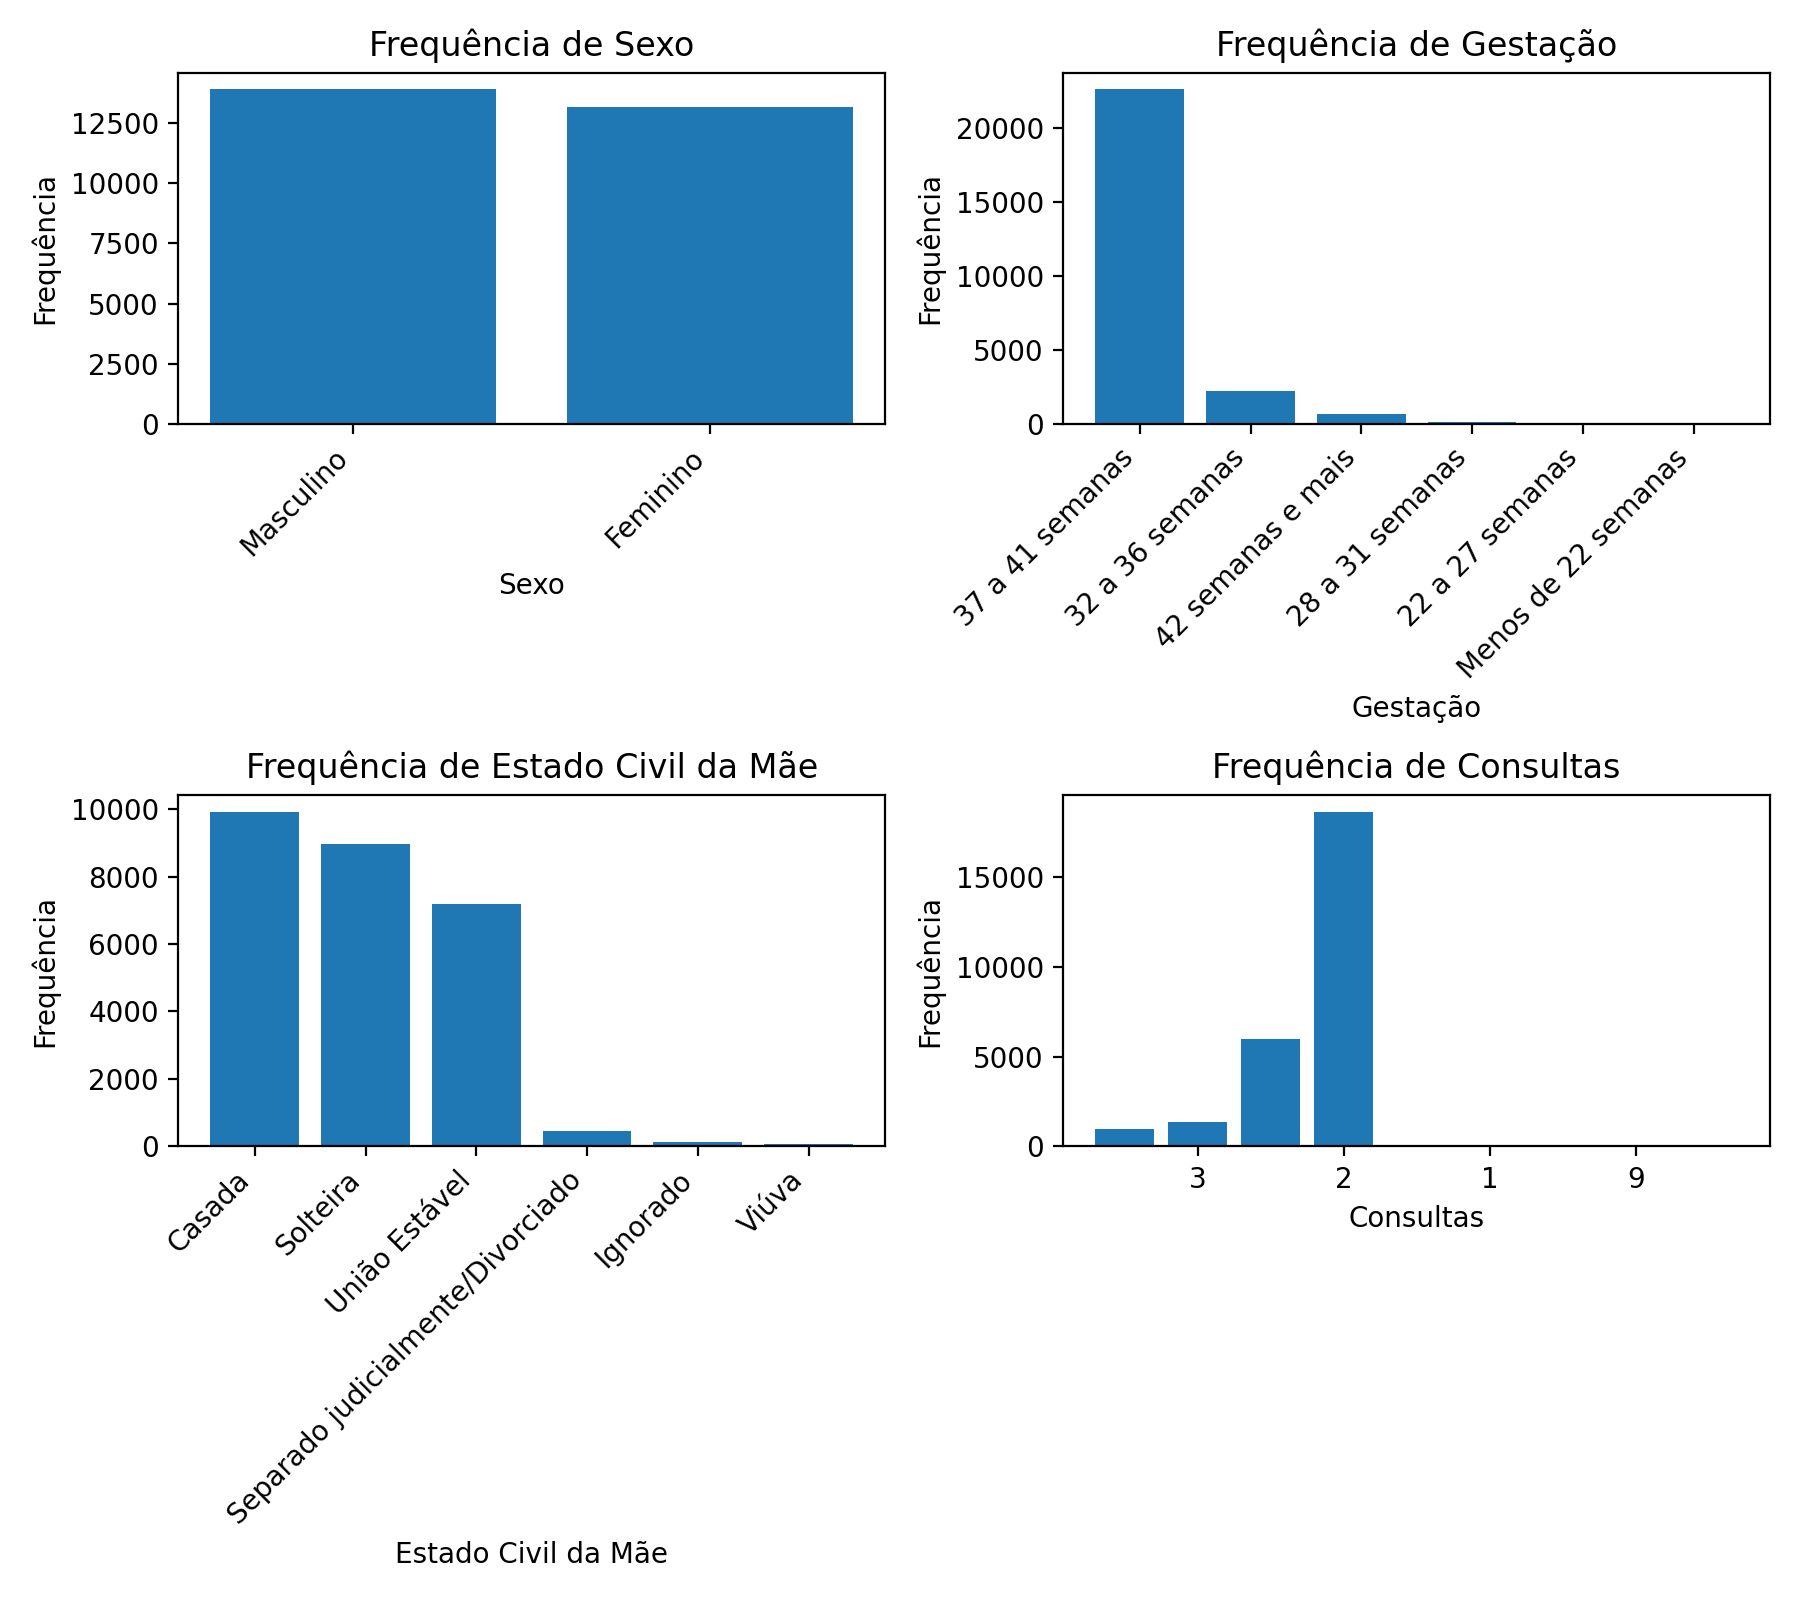

/var/folders/lh/hj21t5rn6fg9r84_yy383zfm0000gn/T/ipykernel_33191/460548029.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(freq_sexo.index, rotation=45, ha='right')
/var/folders/lh/hj21t5rn6fg9r84_yy383zfm0000gn/T/ipykernel_33191/460548029.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(freq_gestacao.index, rotation=45, ha='right')
/var/folders/lh/hj21t5rn6fg9r84_yy383zfm0000gn/T/ipykernel_33191/460548029.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(freq_estcivmae.index, rotation=45, ha='right')
/var/folders/lh/hj21t5rn6fg9r84_yy383zfm0000gn/T/ipykernel_33191/460548029.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 1].set_xticklabels(freq_consultas.index, rotation=0)


In [63]:
freq_sexo = sinasc['SEXO'].value_counts()
freq_gestacao = sinasc['GESTACAO'].value_counts()
freq_estcivmae = sinasc['ESTCIVMAE'].value_counts()
freq_consultas = sinasc['CONSULTAS'].value_counts()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 8))

# Gráfico de barras SEXO
axes[0, 0].bar(freq_sexo.index, freq_sexo.values)
axes[0, 0].set_xlabel('Sexo')
axes[0, 0].set_ylabel('Frequência')
axes[0, 0].set_title('Frequência de Sexo')
axes[0, 0].set_xticklabels(freq_sexo.index, rotation=45, ha='right')

# Gráfico de barras GESTACAO
axes[0, 1].bar(freq_gestacao.index, freq_gestacao.values)
axes[0, 1].set_xlabel('Gestação')
axes[0, 1].set_ylabel('Frequência')
axes[0, 1].set_title('Frequência de Gestação')
axes[0, 1].set_xticklabels(freq_gestacao.index, rotation=45, ha='right')

# Gráfico de barras ESTCIVMAE
axes[1, 0].bar(freq_estcivmae.index, freq_estcivmae.values)
axes[1, 0].set_xlabel('Estado Civil da Mãe')
axes[1, 0].set_ylabel('Frequência')
axes[1, 0].set_title('Frequência de Estado Civil da Mãe')
axes[1, 0].set_xticklabels(freq_estcivmae.index, rotation=45, ha='right')

# Gráfico de barras CONSULTAS
axes[1, 1].bar(freq_consultas.index, freq_consultas.values)
axes[1, 1].set_xlabel('Consultas')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].set_title('Frequência de Consultas')
axes[1, 1].set_xticklabels(freq_consultas.index, rotation=0)

plt.tight_layout()
plt.show()